In [4]:
# Load Data
import zipfile
with zipfile.ZipFile('BBC News Summary.zip', 'r') as zip_ref:
    zip_ref.extractall('')

In [5]:
import os
business_texts=os.listdir('BBC News Summary/News Articles/business')

import os
entertainment_texts=os.listdir('BBC News Summary/News Articles/entertainment')

import os
politics_texts=os.listdir('BBC News Summary/News Articles/politics')

import os
sport_texts=os.listdir('BBC News Summary/News Articles/sport')

import os
tech_texts=os.listdir('BBC News Summary/News Articles/tech')

Articles Business

In [6]:
# tokenization
import nltk
nltk.download('punkt') # one time execution
from nltk.tokenize import sent_tokenize
sentences = []
root='bbc news summary/BBC News Summary/News Articles/business'
for s in business_texts:
  file_ = open(root+'/'+s, "r") 
  business_file=file_.read().replace('\n', '.')
  business_file=business_file.split('.')
  for sent in business_file:
    if sent!='':
      if sent[0].isdigit():
        sentences[-1][0]+=sent_tokenize(sent)[0]
      else:
        sentences.append(sent_tokenize(sent))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [7]:
# Print Sentences
sentences

[['India and Iran in gas export deal'],
 ['India has signed a $40bn (£21bn) deal to import millions of tonnes of liquefied natural gas from Iran'],
 ['Firms led by the Oil & Natural Gas Corporation (ONGC) will also assist in the development of Iranian oil fields'],
 [' Ministers, eager to gain access to energy supplies to meet the demands of a booming economy, secured a similar deal to one between Iran and China'],
 [' The announcement comes as ONGC said it was in talks to buy former assets of troubled Russian oil firm Yukos'],
 [" The agreements with Iran were sealed after talks in New Delhi between Middle East producers and Asia's biggest energy consumers - China, India, Japan and South Korea"],
 ["Iran - Opec's second-biggest oil producer and one of the world's top gas producers - has been pursuing a series of deals, rewarding LNG buyers with participation in development of its oil fields"],
 [' Under the agreement, it will supply India with 75 million tonnes of LPG annually over a 

In [8]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove*.zip

--2020-12-08 02:03:31--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2020-12-08 02:03:31--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2020-12-08 02:03:32--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [9]:
import re
clean_sentences = []
ind=0
while ind < len(sentences):
  i=sentences[ind]
  regex = re.compile('[^a-zA-Z]')
  if len(i)!=0:
    clean_sentences.append(regex.sub(' ', i[0]))
    ind+=1
  else:
    del sentences[ind]

clean_sentences = [s.lower() for s in clean_sentences]

In [10]:
stop_words= ['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'between',
 'into',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'other',
 'some',
 'such',
 'only',
 'own',
 'so',
 'than',
 'too',
 'very',
 's',
 't',
 'can',
 'will',
 'just',
 'now',
 'm',
 'd',
 'll',
 'could',
 'would',
 'more',
 'also',
 'said',
 'mr',
 'however',
 'may']

In [11]:
# function to remove stopwords
def remove_stopwords(sen):
    sen_new = " ".join([i for i in sen if i not in stop_words])
    return sen_new

In [12]:
# remove stopwords from the sentences
clean_sentences = [remove_stopwords(r.split()) for r in clean_sentences]

In [13]:
# Extract word vectors
import numpy as np
word_embeddings = {}
f = open('glove.6B.100d.txt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    word_embeddings[word] = coefs
f.close()

In [15]:
import pandas as pd
business_words={}
for i in clean_sentences:
  if len(i)!=0:
    for w in i.split():
      if w not in business_words:
        business_words[w]=1
      else:
        business_words[w]+=1
        
bs_words=pd.DataFrame.from_dict({'words':list(business_words.keys()),'counts':list(business_words.values()) })
bs_words=bs_words.set_index('words')

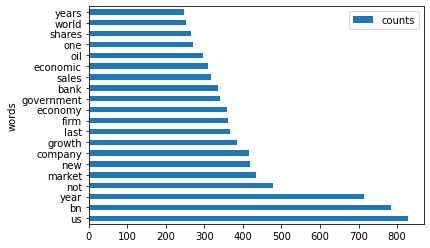

In [16]:
top_twenty=bs_words.nlargest(20, ['counts'])
ax = top_twenty.plot.barh(x=None, y='counts', rot=0)

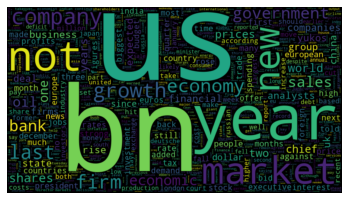

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=900,height=500, max_words=1628,relative_scaling=1,normalize_plurals=False).generate_from_frequencies(business_words)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [18]:
sentence_vectors = []
for i in clean_sentences:
  if len(i) != 0:
    v = sum([word_embeddings.get(w, np.zeros((100,))) for w in i.split()])/(len(i.split())+0.001)
  else:
    v = np.zeros((100,))
  sentence_vectors.append(np.array(v))

sentence_vectors=np.array(sentence_vectors)

In [19]:
def cosine_similarities(mat):
  norm = (mat.T * mat.T).sum(0, keepdims=True) ** .5
  return (mat @ mat.T ) / norm.T / norm 

sim_mat=cosine_similarities(sentence_vectors)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [20]:
from scipy import sparse
sim_mat[sim_mat < 0.9]=0
for i in range(8684):
  sim_mat[i,i] = 0
sim_mat[np.isnan(sim_mat)] =0
sparse_mat = sparse.csr_matrix(sim_mat)
sparse_mat.eliminate_zeros()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  


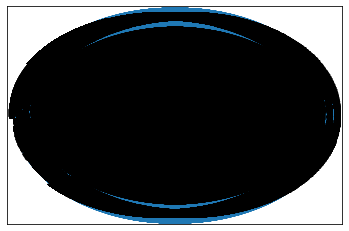

In [21]:
import networkx as nx
SimilarityGraph = nx.from_scipy_sparse_matrix(sparse_mat)
#print the graph
nx.draw_networkx(SimilarityGraph,pos=nx.shell_layout(SimilarityGraph), with_labels=True)

**Articles Sport**

In [36]:
# tokenization
import nltk
nltk.download('punkt') # one time execution
from nltk.tokenize import sent_tokenize
sentences = []
root='bbc news summary/BBC News Summary/News Articles/sport'
for s in sport_texts:
  file_ = open(root+'/'+s, "r", encoding= 'unicode_escape') 
  sport_file=file_.read().replace('\n', '.')
  sport_file=sport_file.split('.')
  for sent in sport_file:
    if sent!='':
      if sent[0].isdigit():
        sentences[-1][0]+=sent_tokenize(sent)[0]
      else:
        sentences.append(sent_tokenize(sent))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [37]:
# Print Sentences
sentences

[["O'Connor aims to grab opportunity"],
 ["Johnny O'Connor is determined to make a big impression when he makes his RBS Six Nations debut for Ireland against Scotland on Saturday"],
 ["The Wasps flanker replaces Denis Leamy but O'Connor knows that the Munster man will be pushing hard for a recall for the following game against England"],
 [' "It\'s a \'horses for courses\' selection really," said O\'Connor'],
 [' "There\'s a lot of competition here and I can\'t just drag my heels around if I don\'t get picked'],
 ['" It looks a definite head-to-head battle between himself and 23-year-old Leamy - three stone heavier than O\'Connor - for the number seven role against the world champions'],
 [" Nonetheless, all O'Connor is currently concerned about is making an impression while winning his third cap"],
 ['"Missing the Italian game was disappointing certainly, but you can\'t dwell on these things - it\'s part and parcel of rugby'],
 [' "Denis has been playing really well and deserved his o

In [40]:
import re
clean_sentences = []
ind=0
while ind < len(sentences):
  i=sentences[ind]
  regex = re.compile('[^a-zA-Z]')
  if len(i)!=0:
    clean_sentences.append(regex.sub(' ', i[0]))
    ind+=1
  else:
    del sentences[ind]

clean_sentences = [s.lower() for s in clean_sentences]

In [41]:
stop_words= ['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'between',
 'into',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'other',
 'some',
 'such',
 'only',
 'own',
 'so',
 'than',
 'too',
 'very',
 's',
 't',
 'can',
 'will',
 'just',
 'now',
 'm',
 'd',
 'll',
 'could',
 'would',
 'more',
 'also',
 'said',
 'mr',
 'however',
 'may']

In [42]:
# function to remove stopwords
def remove_stopwords(sen):
    sen_new = " ".join([i for i in sen if i not in stop_words])
    return sen_new

In [43]:
# remove stopwords from the sentences
clean_sentences = [remove_stopwords(r.split()) for r in clean_sentences]

In [44]:
# Extract word vectors
import numpy as np
word_embeddings = {}
f = open('glove.6B.100d.txt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    word_embeddings[word] = coefs
f.close()

In [45]:
import pandas as pd
sport_words={}
for i in clean_sentences:
  if len(i)!=0:
    for w in i.split():
      if w not in sport_words:
        sport_words[w]=1
      else:
        sport_words[w]+=1
        
sp_words=pd.DataFrame.from_dict({'words':list(sport_words.keys()),'counts':list(sport_words.values()) })
sp_words=sp_words.set_index('words')

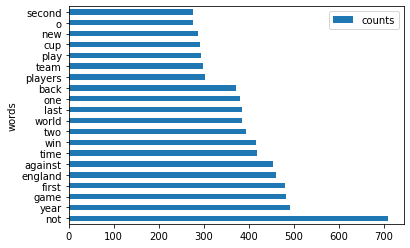

In [46]:
top_twenty=sp_words.nlargest(20, ['counts'])
ax = top_twenty.plot.barh(x=None, y='counts', rot=0)

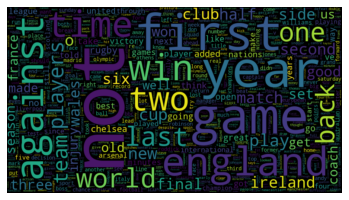

In [47]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=900,height=500, max_words=1628,relative_scaling=1,normalize_plurals=False).generate_from_frequencies(sport_words)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [48]:
sentence_vectors = []
for i in clean_sentences:
  if len(i) != 0:
    v = sum([word_embeddings.get(w, np.zeros((100,))) for w in i.split()])/(len(i.split())+0.001)
  else:
    v = np.zeros((100,))
  sentence_vectors.append(np.array(v))

sentence_vectors=np.array(sentence_vectors)

In [49]:
def cosine_similarities(mat):
  norm = (mat.T * mat.T).sum(0, keepdims=True) ** .5
  return (mat @ mat.T ) / norm.T / norm 

sim_mat=cosine_similarities(sentence_vectors)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [50]:
from scipy import sparse
sim_mat[sim_mat < 0.9]=0
for i in range(8684):
  sim_mat[i,i] = 0
sim_mat[np.isnan(sim_mat)] =0
sparse_mat = sparse.csr_matrix(sim_mat)
sparse_mat.eliminate_zeros()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  


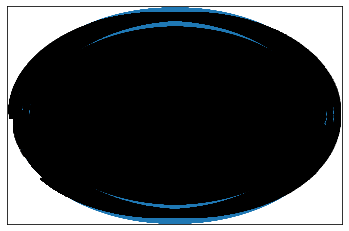

In [51]:
import networkx as nx
SimilarityGraph = nx.from_scipy_sparse_matrix(sparse_mat)
#print the graph
nx.draw_networkx(SimilarityGraph,pos=nx.shell_layout(SimilarityGraph), with_labels=True)

**Articles Politics**

In [53]:
# tokenization
import nltk
nltk.download('punkt') # one time execution
from nltk.tokenize import sent_tokenize
sentences = []
root='bbc news summary/BBC News Summary/News Articles/politics'
for s in politics_texts:
  file_ = open(root+'/'+s, "r") 
  politics_file=file_.read().replace('\n', '.')
  politics_file=politics_file.split('.')
  for sent in politics_file:
    if sent!='':
      if sent[0].isdigit():
        sentences[-1][0]+=sent_tokenize(sent)[0]
      else:
        sentences.append(sent_tokenize(sent))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [54]:
# Print Sentences
sentences

[["Prime minister's questions"],
 ['So who, if anyone, is playing politics with the security of the nation?'],
 ['Michael Howard has no doubt it is the prime minister who, he claims, is "ramming" through Parliament the controversial new anti-terror measures without proper debate'],
 [" He didn't say so, but the Tories believe the prime minister is playing the fear card on this one so he can look tough in the run up to the general election And they believe Tony Blair is using the issue to suggest the Tories are soft on terrorism"],
 [" Why on earth will the prime minister not simply take up the Tories' offer to extend the existing powers temporarily to allow proper parliamentary debate of the laws, he demanded"],
 [' The prime minister claims this is the clearest indication that it is the Tories who are playing politics with the issue by attempting to score cheap political points in parliament'],
 [' Is not the opposition against to the proposed laws "in principle", in which case delayi

In [57]:
import pandas as pd
politics_words={}
for i in clean_sentences:
  if len(i)!=0:
    for w in i.split():
      if w not in politics_words:
        politics_words[w]=1
      else:
        politics_words[w]+=1
        
pl_words=pd.DataFrame.from_dict({'words':list(politics_words.keys()),'counts':list(politics_words.values()) })
pl_words=pl_words.set_index('words')

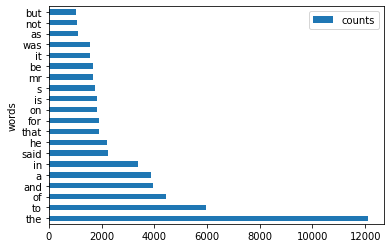

In [58]:
top_twenty=pl_words.nlargest(20, ['counts'])
ax = top_twenty.plot.barh(x=None, y='counts', rot=0)

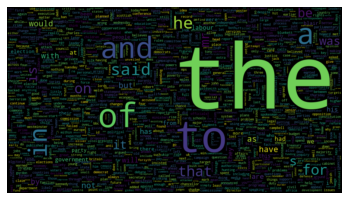

In [59]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=900,height=500, max_words=1628,relative_scaling=1,normalize_plurals=False).generate_from_frequencies(politics_words)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Articles Tech**

In [60]:
# tokenization
import nltk
nltk.download('punkt') # one time execution
from nltk.tokenize import sent_tokenize
sentences = []
root='bbc news summary/BBC News Summary/News Articles/tech'
for s in tech_texts:
  file_ = open(root+'/'+s, "r") 
  tech_file=file_.read().replace('\n', '.')
  tech_file=tech_file.split('.')
  for sent in tech_file:
    if sent!='':
      if sent[0].isdigit():
        sentences[-1][0]+=sent_tokenize(sent)[0]
      else:
        sentences.append(sent_tokenize(sent))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [61]:
# Print Sentences
sentences

[['DVD copy protection strengthened'],
 ['DVDs will be harder to copy thanks to new anti-piracy measures devised by copy protection firm Macrovision'],
 ['The pirated DVD market is enormous because current copy protection was hacked more than five years ago'],
 [' Macrovision says its new RipGuard technology will thwart most, but not all, of the current DVD ripping (copying) programs used to pirate DVDs'],
 [' "RipGuard is designed to'],
 [' reduce DVD ripping and the resulting supply of illegal peer to peer," said the firm'],
 [' Macrovision said the new technology will work in "nearly all" current DVD players when applied to the discs, but it did not specify how many machines could have a problem with RipGuard'],
 [' Some BBC News website users have expressed concerns that the new technology will mean that DVDs will not work on PCs running the operating system Linux'],
 [' The new technology will be welcomed by Hollywood film studios which are increasingly relying on revenue from DVD

In [62]:
import pandas as pd
tech_words={}
for i in clean_sentences:
  if len(i)!=0:
    for w in i.split():
      if w not in tech_words:
        tech_words[w]=1
      else:
        tech_words[w]+=1
        
tch_words=pd.DataFrame.from_dict({'words':list(tech_words.keys()),'counts':list(tech_words.values()) })
tch_words=tch_words.set_index('words')

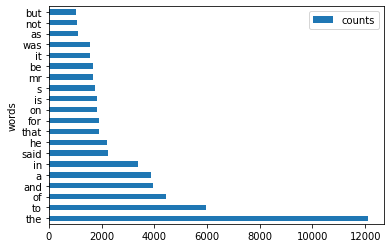

In [63]:
top_twenty=tch_words.nlargest(20, ['counts'])
ax = top_twenty.plot.barh(x=None, y='counts', rot=0)

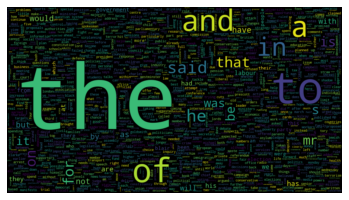

In [64]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=900,height=500, max_words=1628,relative_scaling=1,normalize_plurals=False).generate_from_frequencies(tech_words)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()